In [1]:
import pandas as pd
%matplotlib inline
from pathlib import Path
csvpath = Path('../Resources/high_frequency_euro_ETF_bid_ask_spreads.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='timestamp')
df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50.595622+00:00,0.00
2018-12-24 13:00:02.757045+00:00,108.89
2018-12-24 13:00:02.757115+00:00,-0.22
2018-12-24 13:00:13.828698+00:00,-0.21
2018-12-24 13:00:19.347938+00:00,-0.20


In [2]:
# Resample to 10 Seconds ('10S'), take the mean, and drop the NaN values
df = df.resample('10S').mean().dropna()
df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50+00:00,0.000000
2018-12-24 13:00:00+00:00,54.335000
2018-12-24 13:00:10+00:00,-0.205000
2018-12-24 13:00:20+00:00,-0.186667
2018-12-24 13:00:30+00:00,27.080000


<AxesSubplot:xlabel='timestamp'>

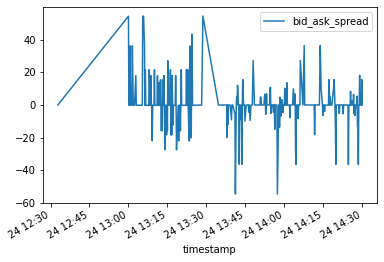

In [3]:
# Plot the resulting bid-ask spread data
df.plot()

In [4]:
# Use the `bid_ask_spread_autocorr` function to calculate the autocorrelation
df.bid_ask_spread.autocorr(1)

0.13633199304665175

# Visualize the Autocorrelation

Plo the ACF and PACF Plots

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

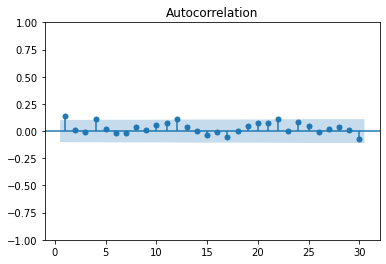

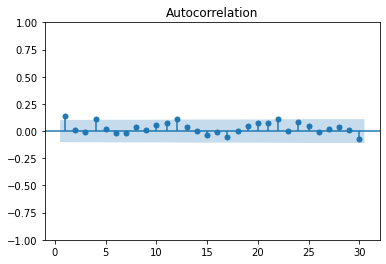

In [6]:
# Plot the ACF of the `bid_ask_spread` data with a lag of 30
plot_acf(df['bid_ask_spread'], lags=30, zero=False)

c:\Users\Roger.Lopez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


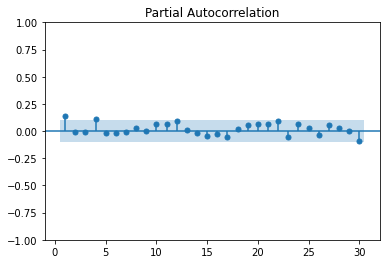

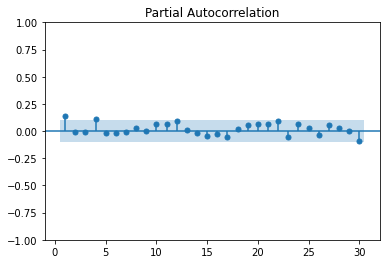

In [7]:
# Plot the PACF with a lag of 30
plot_pacf(df['bid_ask_spread'], lags=30, zero=False)

How many significant lags do you see in these plots outside the default confidence interval of 95%?

Answer: The ACF and PACF both appear to be significant at a lag of 1.